# Color Image Quantization
Reduce the number of colors in images (`lena.png`, `peppers.tif`) to 16 using K-means clustering, implemented from scratch. Log L2 norms per iteration and optionally visualize quantized images.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def kmeans_quantization(image, k=16, max_iterations=100, visualize=False):
    """Perform K-means color quantization on an image.
    
    Args:
        image: Input image (H, W, 3) as float32 in [0, 1].
        k: Number of clusters (colors).
        max_iterations: Maximum number of iterations.
        visualize: If True, display quantized image per iteration.
    
    Returns:
        quantized_image: Image with k colors.
        l2_norms: List of L2 norms per iteration.
    """
    H, W, C = image.shape
    pixels = image.reshape(-1, 3)

    rng = np.random.default_rng(42)
    centroids = pixels[rng.choice(len(pixels), k, replace=False)]

    for it in range(max_iterations):
        dists = np.linalg.norm(pixels[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)

        new_centroids = np.array([
            pixels[labels == ki].mean(axis=0) if np.any(labels == ki) else centroids[ki]
            for ki in range(k)
        ])

        shift = np.linalg.norm(new_centroids - centroids)
        print(f"Iter {it+1}, centroid shift L2 = {shift:.6f}")

        centroids = new_centroids

        if shift < 1e-5:
            break

        
        if visualize:
            quantized_tmp = centroids[labels].reshape(H, W, 3)
            err = calculate_l2_norm(image, quantized_tmp)
            print(f"    image L2 error = {err:.6f}")

    
    quantized_pixels = centroids[labels]
    quantized_image = quantized_pixels.reshape(H, W, 3)

    if visualize:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1); plt.title("Original"); plt.imshow(image); plt.axis("off")
        plt.subplot(1,2,2); plt.title(f"Quantized (k={k})"); plt.imshow(quantized_image); plt.axis("off")
        plt.show()

    return quantized_image, centroids

    


In [5]:
def calculate_l2_norm(original, quantized):
    """Calculate total L2 norm between original and quantized images.
    
    Args:
        original: Original image (H, W, 3) as float32 in [0, 1].
        quantized: Quantized image (H, W, 3) as float32 in [0, 1].
    
    Returns:
        l2_norm: Total L2 norm across all pixels.
    """
    diff = original - quantized             
    sq = np.square(diff)                    
    sum_sq = np.sum(sq)                     
    l2_norm = np.sqrt(sum_sq)               
    return l2_norm

In [8]:
# Load images
lena_path = '.\images\lena.png'

lena = cv2.imread(lena_path).astype(np.float32) / 255.0

# Parameters
k = 16
max_iterations = 100
visualize = True

Iter 1, centroid shift L2 = 0.251336
    image L2 error = 46.669216
Iter 2, centroid shift L2 = 0.110374
    image L2 error = 37.268875
Iter 3, centroid shift L2 = 0.063261
    image L2 error = 33.967083
Iter 4, centroid shift L2 = 0.041358
    image L2 error = 32.952923
Iter 5, centroid shift L2 = 0.031326
    image L2 error = 32.450603
Iter 6, centroid shift L2 = 0.025707
    image L2 error = 32.095158
Iter 7, centroid shift L2 = 0.022260
    image L2 error = 31.818542
Iter 8, centroid shift L2 = 0.020319
    image L2 error = 31.591101
Iter 9, centroid shift L2 = 0.018107
    image L2 error = 31.410839
Iter 10, centroid shift L2 = 0.016343
    image L2 error = 31.268234
Iter 11, centroid shift L2 = 0.014534
    image L2 error = 31.159115
Iter 12, centroid shift L2 = 0.012826
    image L2 error = 31.075226
Iter 13, centroid shift L2 = 0.012010
    image L2 error = 31.006115
Iter 14, centroid shift L2 = 0.010678
    image L2 error = 30.948433
Iter 15, centroid shift L2 = 0.009897
    i

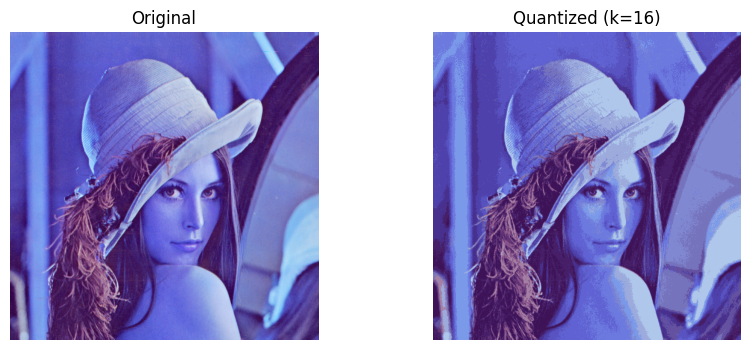

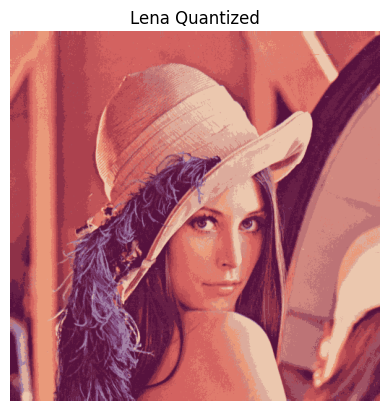

Total L2 Norm: 29.58


True

In [9]:
# Process images
lena_quantized, lena_l2_norms = kmeans_quantization(lena, k, max_iterations, visualize)

# Save L2 norms
with open('L2_norm_log.txt', 'w') as f:
    f.write('Lena L2 Norms:\n' + '\n'.join(map(str, lena_l2_norms)) + '\n')

# Calculate final L2 norms
lena_l2 = calculate_l2_norm(lena, lena_quantized)

# Visualize results
plt.imshow(cv2.cvtColor(lena_quantized, cv2.COLOR_BGR2RGB))
plt.title('Lena Quantized')
plt.axis('off')
plt.show()

print(f'Total L2 Norm: {lena_l2:.2f}')

# Save quantized images
cv2.imwrite('lena_quantized.png', (lena_quantized * 255).astype(np.uint8))